<a href="https://colab.research.google.com/github/Manu-Gr/DB-SCAN---Airlines-Dataset/blob/main/DBSCAN_Assignment_Airlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **DBSCAN - Assignment - Airlines**

In [ ]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Import .csv file and convert it to a DataFrame object
airD = pd.read_csv("EastWestAirlines(1).csv");

airD.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
airD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
airD2 = airD.drop(['ID#'],axis=1)
airD2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
# Normalize the data using standard scalar fit transform to dataset

scaler = StandardScaler()
scaled_air_df = scaler.fit_transform(airD2)
scaled_air_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

## **Model Building**

In [ ]:
# DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(scaled_air_df)

DBSCAN(eps=1, min_samples=4)

In [ ]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
# Adding the cluster column to dataset
airD2['clusters']=dbscan.labels_
airD2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [ ]:
airD2.groupby('clusters').agg(['mean']).reset_index()

,clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,184694.319471,977.113422,2.763705,1.058601,1.092628,40964.655955,22.765595,2248.875236,6.516068,4754.215501,0.706994
1,0,53978.079794,5.088374,1.658945,1.000000,1.000000,9064.591163,8.487773,138.320463,0.434148,3802.836122,0.000000
2,1,62092.632969,9.785974,2.591985,1.000000,1.000000,22952.648452,12.862477,288.490893,0.913479,4511.039162,1.000000
3,2,34806.538462,0.000000,1.000000,2.000000,1.000000,8389.769231,12.000000,19.230769,0.153846,3186.153846,0.000000
4,3,202750.000000,0.000000,4.000000,1.000000,1.000000,43155.666667,20.333333,2456.666667,4.666667,4447.333333,0.000000
5,4,36413.428571,0.000000,1.000000,3.000000,1.000000,14341.142857,13.857143,57.142857,0.285714,3537.285714,0.000000
6,5,60932.000000,1794.500000,3.750000,1.000000,1.000000,39889.750000,16.250000,250.000000,0.750000,5029.000000,1.000000
7,6,164883.400000,1471.600000,1.000000,1.000000,1.000000,8472.800000,5.000000,300.000000,1.400000,4173.400000,1.000000
8,7,27113.888889,2475.444444,1.000000,1.000000,1.000000,2169.111111,4.555556,44.444444,0.333333,1900.111111,0.000000


In [ ]:
airD2.groupby('clusters').agg(['count']).reset_index()

,clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,count,count,count,count,count,count,count,count,count,count,count
0,-1,529,529,529,529,529,529,529,529,529,529,529
1,0,2331,2331,2331,2331,2331,2331,2331,2331,2331,2331,2331
2,1,1098,1098,1098,1098,1098,1098,1098,1098,1098,1098,1098
3,2,13,13,13,13,13,13,13,13,13,13,13
4,3,3,3,3,3,3,3,3,3,3,3,3
5,4,7,7,7,7,7,7,7,7,7,7,7
6,5,4,4,4,4,4,4,4,4,4,4,4
7,6,5,5,5,5,5,5,5,5,5,5,5
8,7,9,9,9,9,9,9,9,9,9,9,9


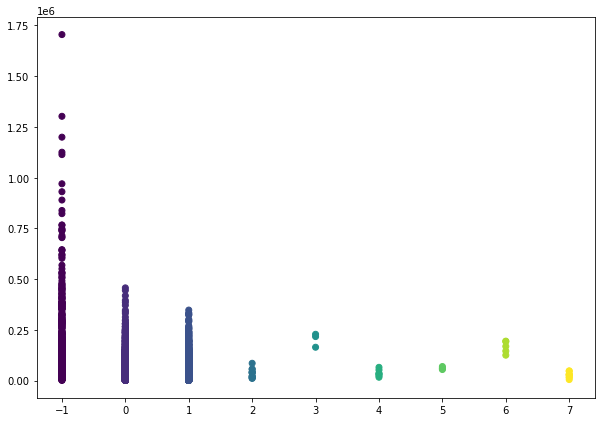

In [ ]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airD2['clusters'],airD2['Balance'], c=dbscan.labels_) 

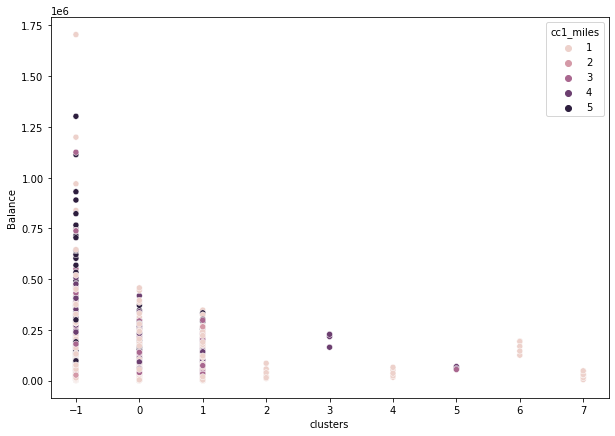

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=airD2,x="clusters",y="Balance",hue="cc1_miles")

### **Model Building**

###**2nd Iteration** 

In [ ]:
# DBSCAN Clustering
dbscan1=DBSCAN(eps=1.5,min_samples=4)
dbscan1.fit(scaled_air_df)

DBSCAN(eps=1.5, min_samples=4)

In [ ]:
#Noisy samples are given the label -1.
dbscan1.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
# Adding the cluster column to dataset
airD3 = airD2.copy()
airD3['clusters1']=dbscan1.labels_
airD3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters,clusters1
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [ ]:
airD3.groupby('clusters1').agg(['mean']).reset_index()

,clusters1,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,218692.941980,1336.300341,2.805461,1.075085,1.167235,47158.245734,25.740614,3103.075085,9.078498,4852.665529,0.74744,-1.000000
1,0,56676.977658,33.191560,1.687216,1.000000,1.000000,9644.678113,8.766239,174.394704,0.516343,3804.859330,0.00000,-0.000827
2,1,73200.194113,63.933970,2.628481,1.000000,1.000000,24755.015911,13.739857,401.856006,1.248210,4569.745426,1.00000,0.793954
3,2,38556.733333,0.000000,1.000000,2.000000,1.000000,8951.533333,12.933333,60.000000,0.400000,3390.400000,0.00000,1.600000
4,3,36524.250000,0.000000,1.000000,3.000000,1.000000,15518.500000,14.500000,50.000000,0.250000,3179.625000,0.00000,3.375000
5,4,56856.250000,6047.250000,1.000000,1.000000,1.000000,3648.500000,4.000000,216.750000,0.750000,3726.500000,0.00000,-1.000000
6,5,31161.600000,0.000000,1.000000,2.000000,1.000000,8723.400000,13.800000,350.000000,1.000000,3314.800000,1.00000,-1.000000


In [ ]:
airD3.groupby('clusters1').agg(['count']).reset_index()

,clusters1,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
,,count,count,count,count,count,count,count,count,count,count,count,count
0,-1,293,293,293,293,293,293,293,293,293,293,293,293
1,0,2417,2417,2417,2417,2417,2417,2417,2417,2417,2417,2417,2417
2,1,1257,1257,1257,1257,1257,1257,1257,1257,1257,1257,1257,1257
3,2,15,15,15,15,15,15,15,15,15,15,15,15
4,3,8,8,8,8,8,8,8,8,8,8,8,8
5,4,4,4,4,4,4,4,4,4,4,4,4,4
6,5,5,5,5,5,5,5,5,5,5,5,5,5


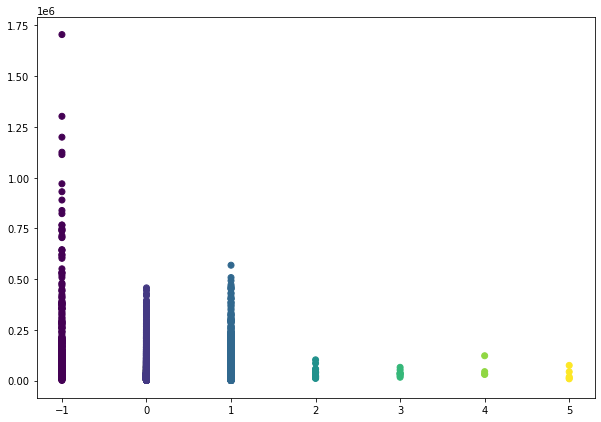

In [ ]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airD3['clusters1'],airD2['Balance'], c=dbscan1.labels_) 

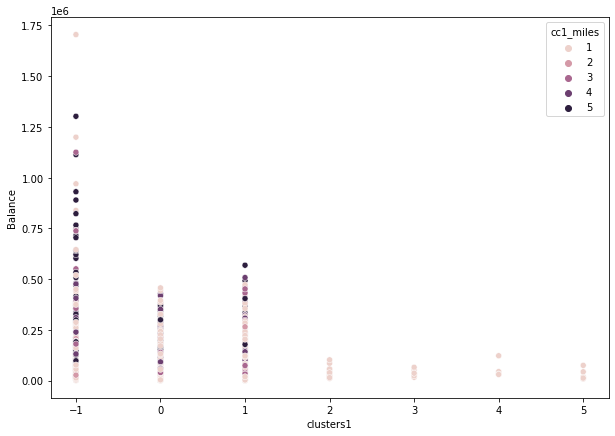

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=airD3,x="clusters1",y="Balance",hue="cc1_miles")